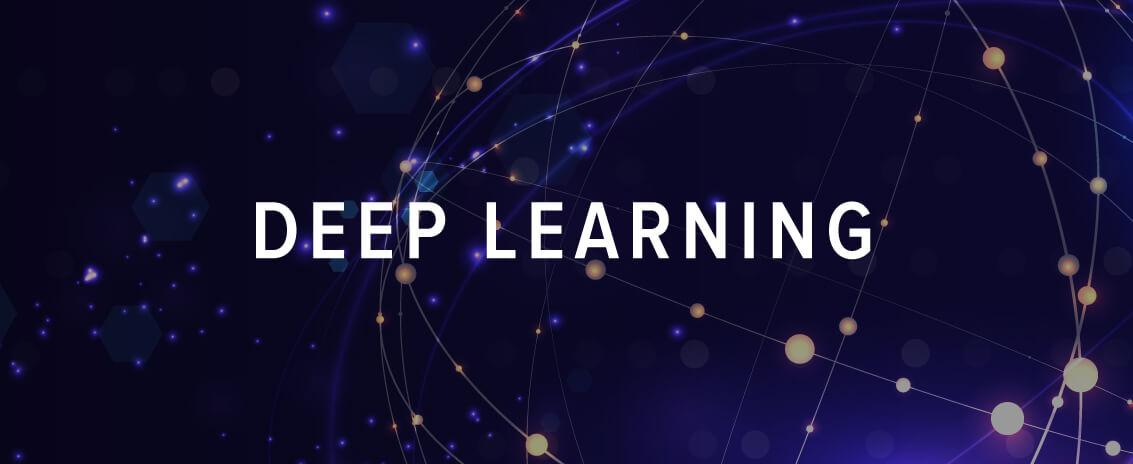

<h1 style="text-align:center; font-family:Helvetica; color:#03045E"> Some Basics of Deep Learning Explained - Easy for Beginners </h1>

Today we are going to learn how to 
<b style="color:#0077B6">Build your first Deep Learning Model Using Keras API</b>, and we gonna use 
<b style="color:#0077B6">Fashion MNIST</b> dataset for this project.
I hope you like this Notebook 😉.

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
    <h2 class="list-group-item list-group-item-action active" data-toggle="list" 
        style='color:white; background:#0096C7; border:0' role="tab" 
        aria-controls="home">
        <center>Quick Navigation</center>
    </h2>
</div>

* [1. Introduction](#1)
* [2. Imoprting Libraries](#2)
* [3. Loading Data](#3)
* [4. Building The Model](#4)
* [5. Training & Evaluating The Model](#5)
* [6. Saving The Model](#6)

<a id="1"></a>
<h1>1 <span style='color:#4895EF'>|</span> Introduction</h1>

Before you start building your deep-learning model, you have to know somethings like :
#### 1. What is the **<span style="color:#0077B6">Data</span>** and the **<span style="color:#0077B6"> Target</span>** of it?
  * **Data are images📷 need to be labeled?** if so, **how many label** do I have?
  * **Data are structred data like tables📋** and I need to predict target value of it?
   - **Is the target value:**:
     - **Continous📉** (like prices, tempreture, etc): here we use **regression**.
     - **Descrite📊** (like types of something, names, etc): here we use **classification**.
  * What is **Number of data entries**? Are there **missing values or outliers** (we neglect them in image data cause there are other problems there.)?
  * If **images**, Are they **gray scaled images (black & white) or RGB colored?** and what is the **shape of the images**?
  
#### 2. Deep Learning Model Questions:
  * Need some **<span style="color:#0077B6">Image Processing</span>** (like: Conventional & pooling) before enter the Model core?
   - (if input data shape are large ex: (1024,1024) then it has to be processed to be minimized to for ex: (64,64)).
  * Model **<span style="color:#0077B6">Architecture</span>** :  
    (**Note:** "Arcticture" means the arrangment of the Layers in the model.)
    * **<b style="color:#D00000">Shape of the input layer</b>**?
     - (It have to be **same as input data shape** or after minimized).
    * Number of **<b style="color:#D00000">Hidden layers</b>**, and how many **<b style="color:#D00000">Neurons in each hidden layer</b>**?
     - (**Note:** More hidden layers means more complex features extracted, but it would take time to train model cause of much   parameters.)
    * Number of **<b style="color:#D00000">Output neurons</b>**:
     - for **binary classes data** (one or two labels, like: cat vs dog): we can use one output neuron (0 for cat, 1 for dog).
     - for **multi classes data** (more than two labels, like: cat, dog, bird, etc): we use number of output neurons same as number of labels.
       - (as we have **one neuron represent each label**.)
    * **<b style="color:#D00000">Activation functions</b>** (A function define how each neuron will be activated): 
      - For **hidden layers** recommended ➡️ Relu.
      - For **output layers** recommended:
        - Binary classes ➡️ Logistic/Tanh (Bounded).
        - Multi classes ➡️ Softmax/Relu (+ve).
    * **<b style="color:#D00000">Loss Function</b>** (The way we compute error of the model):
      - recommended ➡️ MSE (Mean Square Error).

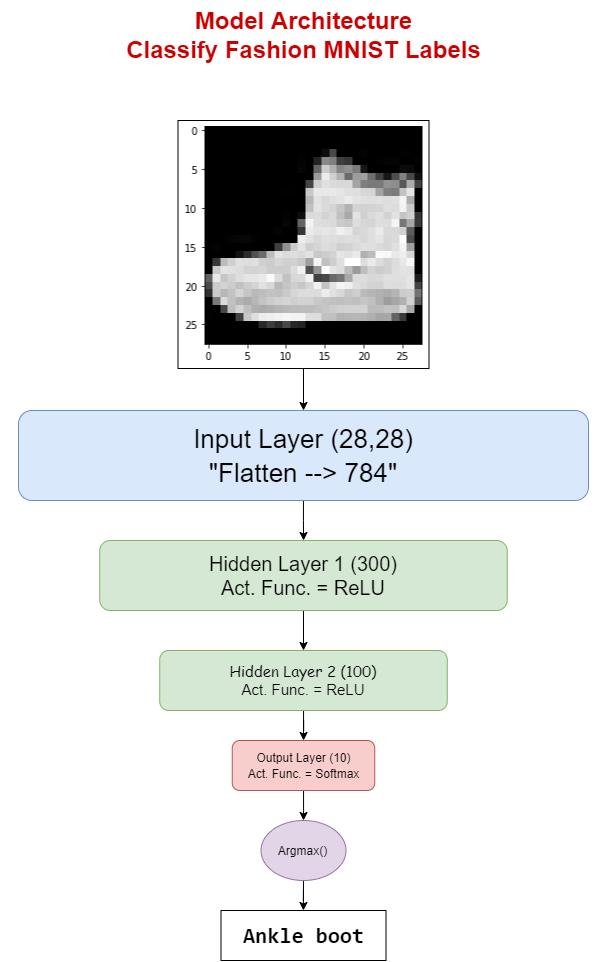

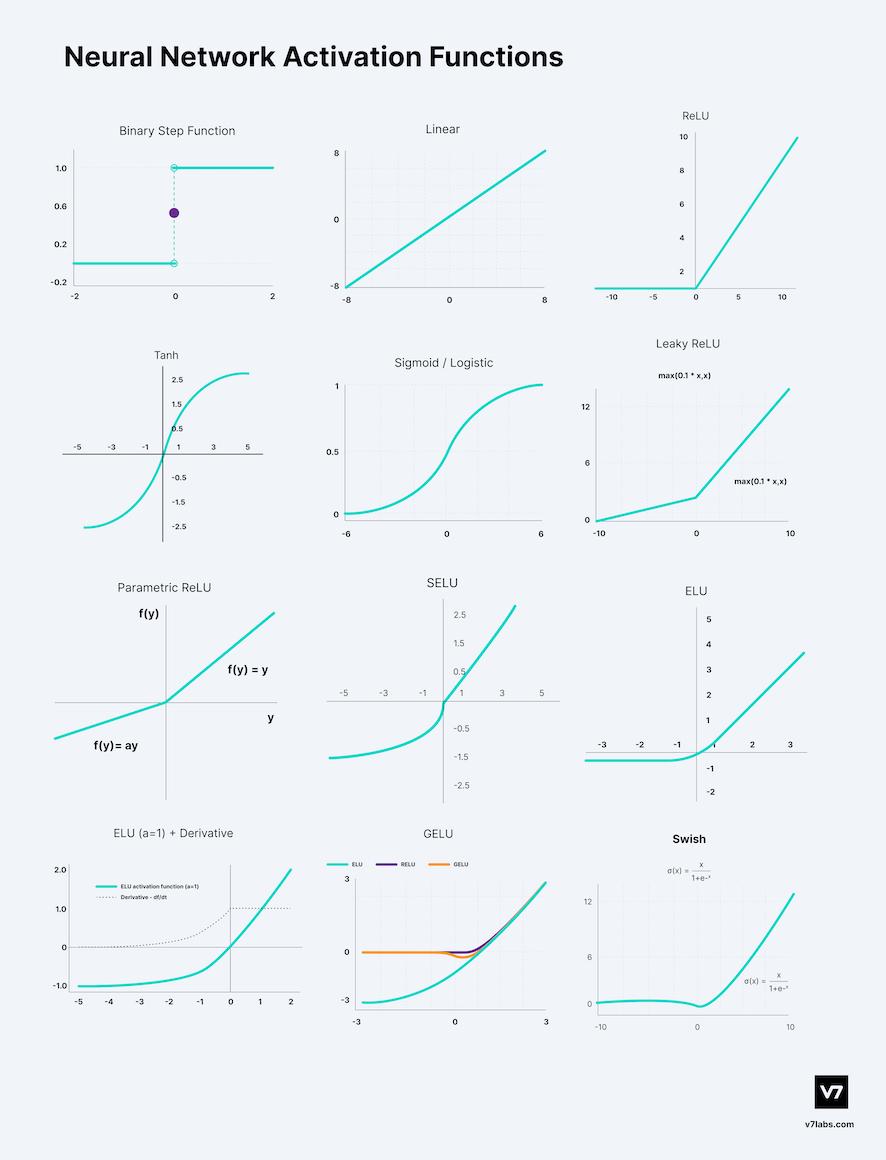

<a id="2"></a>
<h1>2 <span style='color:#4895EF'>|</span> Imoprting Libraries</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

<a id="3"></a>
<h1>3 <span style='color:#4895EF'>|</span> Loading Data</h1>

We will use **Fashion MNIST** dataset, it is a dataset of images of some labeled clothes.  
Labels are wrote down after 2 cells of code.  
Here **<b style="color:#D00000">x_train, x_test</b> represent <span style="color:#0077B6">pixels of images</span>**, And **<b style="color:#D00000">y_train, y_test</b> represent <span style="color:#0077B6"> labels</span>** for these images.  
We will make model predicts label for a given image ...

* **<b style="color:#D00000">Important Note</b>**: input data need to be scaled between [0,1] to prevent underfiiting.

In [2]:
# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Scaling pixels of X_train images to be within [0,1], to prevent underfittng problem
x_train = x_train/255
x_test = x_test/255

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
# Checking the shape of data
print('x_train shape :', x_train.shape)
print('y_train shape :', y_train.shape)
print('x_test shape :', x_test.shape)
print('y_test shape :', y_test.shape)

x_train shape : (60000, 28, 28)
y_train shape : (60000,)
x_test shape : (10000, 28, 28)
y_test shape : (10000,)


Now we know that **Shape of input layer is (28,28)** as images.

In [4]:
# defining decoder labels
labels = {0:'T-shirt/top',
1:'Trouser',
2:'Pullover',
3:'Dress',
4:'Coat',
5:'Sandal',
6:'Shirt',
7:'Sneaker',
8:'Bag',
9:'Ankle boot'}

Now we know that **Number of output neurons are 10** as for labels.

It's Ankle boot


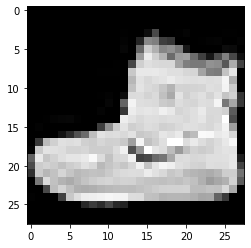

In [5]:
# See sample image of index i from data
i = 0
plt.imshow(x_train[i], cmap='gray')
print('It\'s {}'.format(labels[y_train[i]]))

<a id="4"></a>
<h1>4 <span style='color:#4895EF'>|</span> Building The Model</h1>

### There are some common steps to make our model:
1. Define **<span style="color:#0077B6">Model Architecture</span>**.
2. **<span style="color:#0077B6">Build/Connect Model Layers</span>**.
3. **<span style="color:#0077B6">Compile</span>** the model.
4. **<span style="color:#0077B6">Fit/Train</span>** the model.
5. Check **<span style="color:#0077B6">Training History</span>**.
6. **<span style="color:#0077B6">Evaluate</span>** the model.
  
#### We will load the model (if existed). And if not, we will create it from scratch
cause every time we would run the notebook we will start from the last point we stopped

In [6]:
try :
    # Load our model
    model = tf.keras.models.load_model(r'Fashion MNIST Model.h5')

except :
    # Building Our Model By Sequential
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[28,28]), # Flatten is usually used as input layer
        tf.keras.layers.Dense(300, activation='relu'), # first Number (300) is number of neurons in the layer
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax') # Note that NO. output neurons are 10
        ])
    
    # Compile model and define its (optimizer, loss, metrics)
    model.compile(
        optimizer= "sgd", # SGD (Stochastic Gradient Descent) it is same as "Gradient Descent"
                          # but processed to lower size of data, not all as classical GD
        loss= "sparse_categorical_crossentropy",
        metrics= ["accuracy"] # We define some metrics to track during model training/valdating and test, like: accuracey
        )

2022-07-11 00:03:56.978644: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [7]:
model.summary() # Check The Model Architecture

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


#### Why **sparse_categorical_crossentropy** as **loss function**?
* **categorical_crossentropy (cce):** produces a one-hot array containing the probable match for each category.
* **sparse_categorical_crossentropy (scce)**: produces a category index of the most likely matching category. 
  
For more information please check https://stackoverflow.com/questions/58565394/what-is-the-difference-between-sparse-categorical-crossentropy-and-categorical-c

<a id="5"></a>
<h1>5 <span style='color:#4895EF'>|</span> Training & Evaluating The Model</h1>

In [8]:
# Fitting (training) model to train data
history = model.fit(x_train, y_train,
                    epochs=40,  # epochs is the number of iterations of the model
                                # (how many times will the data passed to the model)
                    validation_split=0.2  # Here we split training data by:
                                            # 20% for validating
                                            # 80% for training
                   )

2022-07-11 00:03:57.584808: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/40
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7442 - accuracy: 0.7563 - val_loss: 0.5461 - val_accuracy: 0.8146
Epoch 2/40
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4993 - accuracy: 0.8258 - val_loss: 0.4674 - val_accuracy: 0.8368
Epoch 3/40
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4547 - accuracy: 0.8401 - val_loss: 0.4399 - val_accuracy: 0.8457
Epoch 4/40
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4247 - accuracy: 0.8511 - val_loss: 0.4229 - val_accuracy: 0.8518
Epoch 5/40
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4050 - accuracy: 0.8586 - val_loss: 0.4132 - val_accuracy: 0.8558
Epoch 6/40
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3870 - accuracy: 0.8639 - val_loss: 0.4184 - val_accuracy: 0.8556
Epoch 7/40
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3748 - accuracy: 0.8681 - val_loss: 0.3867 - val_accuracy:

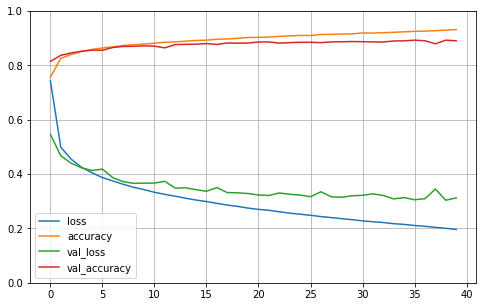

In [9]:
# Plot accuracy and loss for both training and validition during model training
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

**Note:** Validation metrics are more important than training parameters.
 - As they represent how model acts with data he didn't see before while training.

In [10]:
# evaluate model to see how it is gonna act on test data
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3379 - accuracy: 0.8812


[0.3379170894622803, 0.8812000155448914]

## See where model goes wrong!

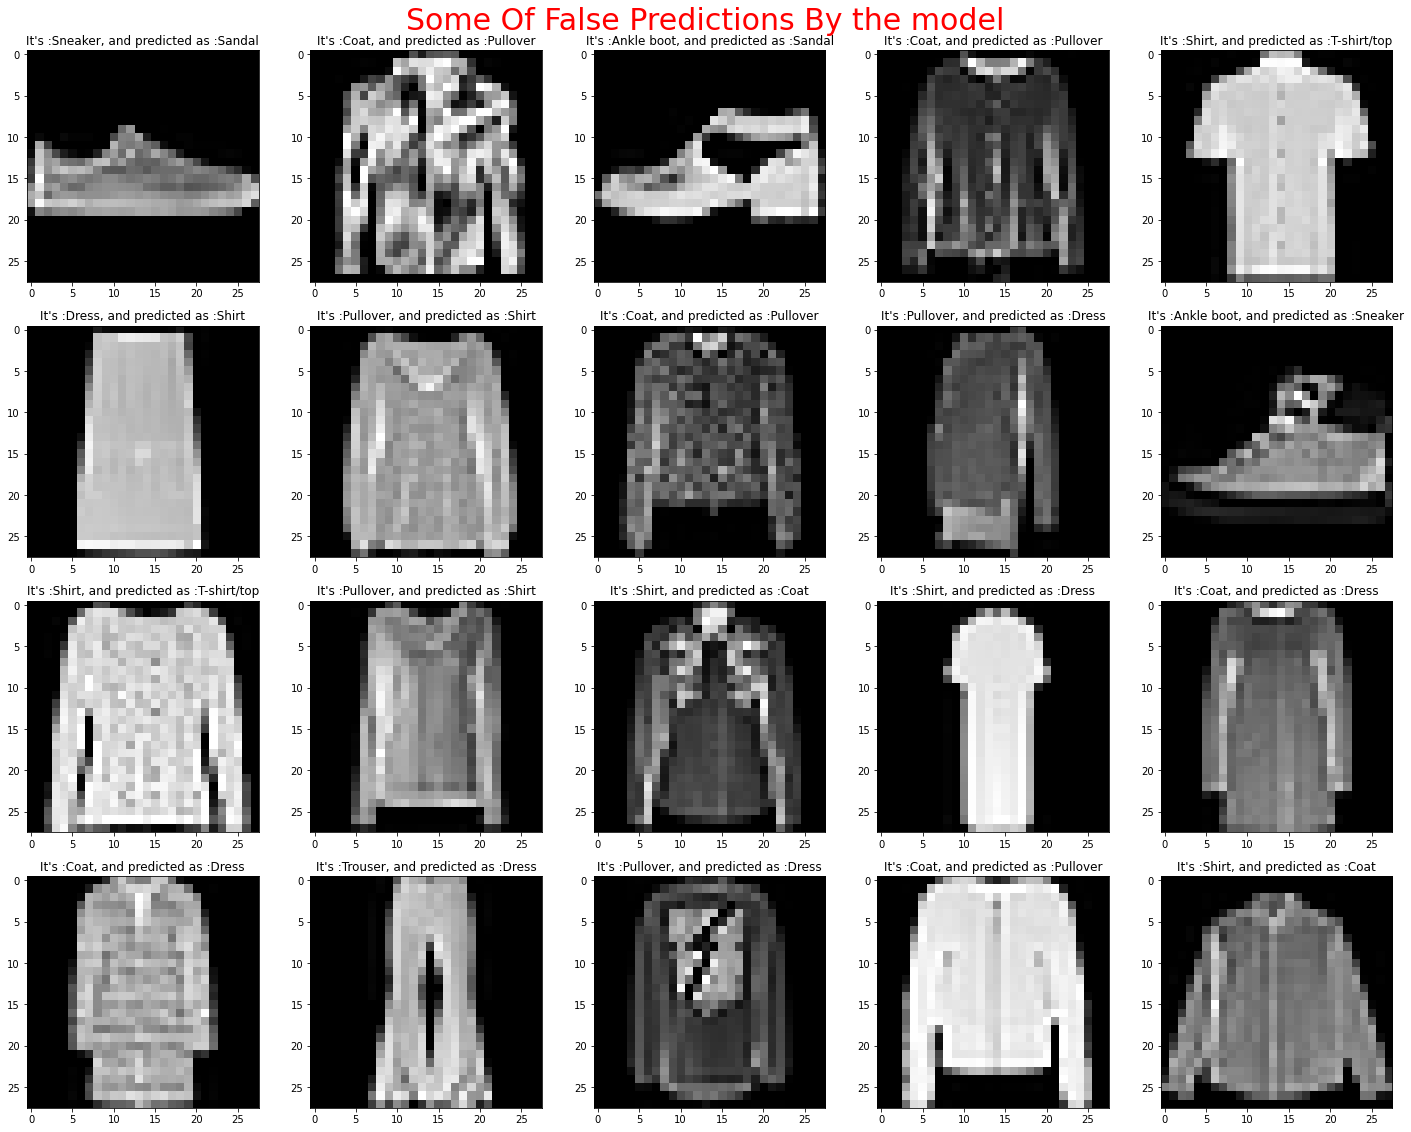

In [11]:
# Get list of predictions of x_test data for model
predictions = model.predict(x_test)

# Making a list of not_true predictions the model has made
not_true = []
for i in range(x_test.shape[0]):
    if y_test[i] != predictions[i].argmax():
        not_true.append(i)
        
# See the images where our model gone wrong

# making subplots to plot multi images in one single plot
fig , ax = plt.subplots(nrows= 4, ncols= 5, figsize=(20,16))

for ind in range(4*5):
    axis = ax.flatten()[ind] # axis here refer to every one plot of subplots "axes"
    img = x_test[not_true[ind]] # here we get the not true classified image of index'ind' in Not_true list
    
    axis.imshow(img, cmap='gray') # Plot image in black & white
    # we will write the predicted and true classes for every image, stored in (string) variable
    string = 'It\'s :' +str(labels[y_test[not_true[ind]]]) +', and predicted as :' + str(labels[predictions[not_true[ind]].argmax()])
    #plt.gcf()
    axis.set_title(string) # putting (string) variable as a title for each image
    plt.tight_layout() 

plt.suptitle('Some Of False Predictions By the model', size=30 ,color='red') # write title for the overall image
plt.tight_layout()

<a id="6"></a>
<h1>6 <span style='color:#4895EF'>|</span> Saving The Model</h1>

In [12]:
# Now we will save our trained model
model.save(r'Fashion MNIST Model.h5')

#### I hope you **<span style="color:#0077B6">Like</span>** it 💙.